# Ejercicios 8 Sol

#### 1 Ejercicio

El fichero [oil_price.csv](../datos/oil_price_monthly.csv) contiene información mensual del precio del petróleo desde el año 1985. Abre el fichero y mira el aspecto que tiene.
* La primera columna contiene el mes y el año en formato 'yyyy-mm'.
* La segunda columna contiene el precio del barril expresado en euros.

----
* Realiza la carga del fichero utilizando la función __read_csv__ de pandas. El DataFrame creado debe tener como índices la fecha.


In [11]:
# Sol:
import pandas as pd
precios = pd.read_csv('../datos/oil_price_monthly.csv',
                     names = ['Precio_barril'])
precios.head()

,Precio_barril
1985-05,36.6383
1985-06,35.4184
1985-07,34.2709
1985-08,33.8411
1985-09,34.6826


In [12]:
precios[precios.Precio_barril > 60].head()

,Precio_barril
2007-11,62.8231
2007-12,62.7599
2008-01,62.4387
2008-02,64.0862
2008-03,66.1209


---
* Determinar el mes y el año donde por primera vez el precio del petróleo superó los 40 euros, los 60 y los 80 euros.
    * Primero crea un DataFrame con el mes y el año donde por primera vez el precio del petróleo superó los 40.
    * En segundo lugar crea un DataFrame con el mes y el año donde por primera vez el precio del petróleo superó los 60.
    * En tercer lugar crea un DataFrame con el mes y el año donde por primera vez el precio del petróleo superó los 80.
    * Consulta la ayuda de la función `join`para saber cómo funciona y para qué sirve. Para ello ejecuta `pd.join?`.
    * Utiliza la función `join` para unir los datos en un unico DataFrame.
    

La solución es 2005-03, 2007-11, 2008-05.

In [13]:
#Sol:
resultado40 = pd.DataFrame(precios[precios['Precio_barril'] > 40].iloc[0])
resultado60 = pd.DataFrame(precios[precios['Precio_barril'] > 60].iloc[0])
resultado80 = pd.DataFrame(precios[precios['Precio_barril'] > 80].iloc[0])

resultado40.join(resultado60.join(resultado80))


,2005-03,2007-11,2008-05
Precio_barril,40.4137,62.8231,80.1039


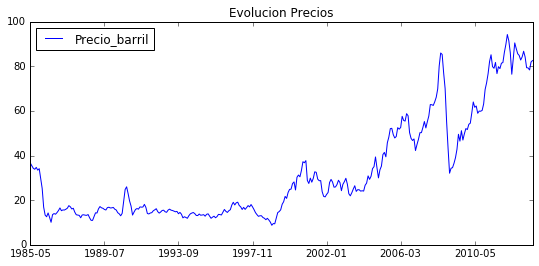

In [14]:
# Rrepresenta gráficamente la evolución de los precios
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
precios.plot(title = 'Evolucion Precios',
                 figsize=(9,4));

#### 2 Ejercicio

El fichero [rotterdam_rainfall.txt](../datos/rotterdam_rainfall.txt) recoge los datos de las precipitaciones diarias de la estación meteorológica de Rotterdam en 2012.

* La primera columna representa la fecha
* La segunda columna representa la cantidad de precipitaciones expresado en 0.1 mm (-1 si es menor a 0.05 mm).

__Notas__:

* Carga los datos en un DataFrame con la función __read_csv__
* El índice del DataFrame ha de ser la fecha
* Utiliza la opción _parse_dates_ para parsear la fecha.

In [15]:
# Sol
ruta = '../datos/rotterdam_rainfall.txt'
datos = pd.read_csv(ruta, 
                    names = ['Fecha', 'Volumen'],
                    index_col = ['Fecha'], 
                    parse_dates=[0])
datos.head()

,Volumen
Fecha,
2012-01-01,207
2012-01-02,-1
2012-01-03,144
2012-01-04,36
2012-01-05,84


* Modifica los valores de la cantidad de precipitaciones a 0 cuando su valor sea -1.

In [8]:
datos[datos.Volumen == -1] = 0
datos.head()

,Volumen
Fecha,
2012-01-01,207
2012-01-02,0
2012-01-03,144
2012-01-04,36
2012-01-05,84


-----
* Calcula el día que ha tenido mayor cantidad de precipitación y la cantidad de precipitación

In [13]:
datos.Volumen.max()

224

In [15]:
datos[datos.Volumen == 224]

,Volumen
Fecha,
2012-12-22,224


#### 3 Ejercicio

El archivo [WordPhones](../datos/WorldPhones01.csv) 
recoge información acerca del número de teléfonos en varias regiones del mundo (en miles).

- Cada columna se corresponde con una región del mundo. Las regiones son:
["N.Amer","Europe","Asia","S.Amer","Oceania","Africa","Mid.Amer"]

- Cada fila se corresponde con un año. Los años son: 
[1951, 1956, 1957, 1958, 1959, 1960, 1961]

-----

* Escribir la expresión Python que recoja los datos del año 1960
    * Primero descarga el archivo [WordPhones](../datos/WorldPhones01.csv) en tu directorio de trabajo.
    * Escribe la expresión Python para seleccionar la fila que se corresponde con el año 1960 (Utiliza como filtro un array de booleanos).

In [27]:
# Sol:
datos = pd.read_csv('../datos/WorldPhones01.csv',
                    skiprows = 1,
                    names = ['Year',"N.Amer","Europe","Asia","S.Amer","Oceania","Africa","Mid.Amer"],
                    index_col = ['Year'])
datos

,N.Amer,Europe,Asia,S.Amer,Oceania,Africa,Mid.Amer
Year,,,,,,,
1951,45939,21574,2876,1815,1646,89,555
1956,60423,29990,4708,2568,2366,1411,733
1957,64721,32510,5230,2695,2526,1546,773
1958,68484,35218,6662,2845,2691,1663,836
1959,71799,37598,6856,3000,2868,1769,911
1960,76036,40341,8220,3145,3054,1905,1008
1961,79831,43173,9053,3338,3224,2005,1076


In [28]:
#Sol: 
datos.loc[1960]


N.Amer      76036
Europe      40341
Asia         8220
S.Amer       3145
Oceania      3054
Africa       1905
Mid.Amer     1008
Name: 1960, dtype: int64

In [29]:
# Sol:
datos.Europe

Year
1951    21574
1956    29990
1957    32510
1958    35218
1959    37598
1960    40341
1961    43173
Name: Europe, dtype: int64

* Ahora representa en una gráfica la evolución que ha tenido "Europe" entre los años 1956 y 1960. Ejecuta el siguiente bloque de código.

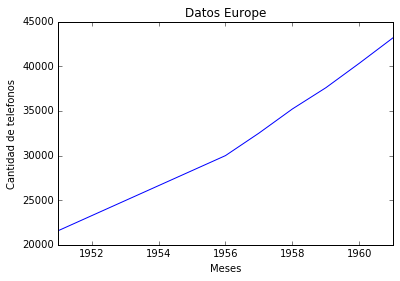

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


datos.Europe.plot()

plt.xlabel('Meses')
plt.ylabel('Cantidad de telefonos')
plt.title('Datos Europe')

* Ahora representa en una gráfica la evolución que ha tenido "Europe"  y "Africa" entre los años 1956 y 1960. Ejecuta el siguiente bloque de código.

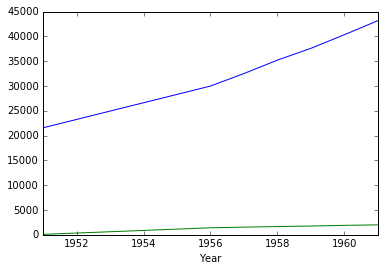

In [31]:
datos.Europe.plot()
datos.Africa.plot()

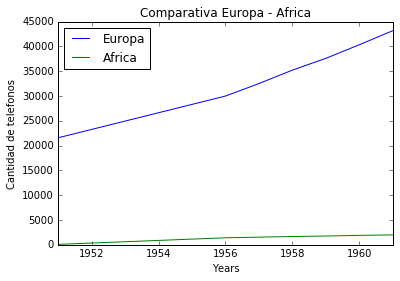

In [32]:
x = np.arange(1,8)
datos.Europe.plot()
datos.Africa.plot()

plt.xlabel('Years')
plt.ylabel('Cantidad de telefonos')

plt.title('Comparativa Europa - Africa')

plt.legend(['Europa','Africa'],loc='best');

* Podemos representar todos los países

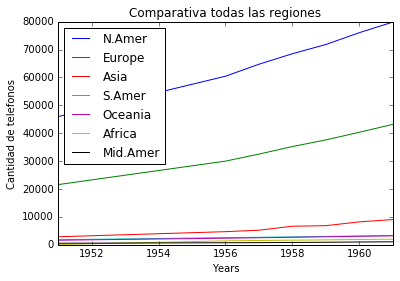

In [33]:
datos.plot() 

plt.xlabel('Years')
plt.ylabel('Cantidad de telefonos')
plt.title('Comparativa todas las regiones')
plt.legend(datos,loc='best');

## References

http://nbviewer.ipython.org/github/mbakker7/exploratory_computing_with_python/tree/master/